In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from ggplot import *
plt.style.use('default')

In [5]:
git_df = pd.read_csv("TopStaredRepositories.csv", parse_dates=['Last Update Date'], dayfirst=True)
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7k,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7k,visualization,https://github.com/d3/d3


In [6]:
git_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
Username            980 non-null object
Repository Name     980 non-null object
Description         977 non-null object
Last Update Date    980 non-null datetime64[ns]
Language            877 non-null object
Number of Stars     980 non-null object
Tags                489 non-null object
Url                 980 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 61.3+ KB


In [7]:
git_df_max = git_df['Number of Stars'].str.contains('k').all()
git_df_max

True

In [8]:
git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)

In [9]:
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7,visualization,https://github.com/d3/d3


In [10]:
git_df.tail()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
975,chrisjenx,Calligraphy,Custom fonts in Android the easy way...,2017-06-06 19:23:22,Java,6.4,NaN,https://github.com/chrisjenx/Calligraphy
976,eliangcs,http-prompt,HTTPie + prompt_toolkit = an interactive comma...,2017-05-11 13:27:42,Python,6.4,"python,syntax-highlighting,shell,cli,http,auto...",https://github.com/eliangcs/http-prompt
977,robertdavidgraham,masscan,"TCP port scanner, spews SYN packets asynchrono...",2017-06-22 06:27:09,C,6.4,NaN,https://github.com/robertdavidgraham/masscan
978,ElemeFE,mint-ui,Mobile UI elements for Vue.js,2017-06-22 10:02:35,Vue,6.4,"vue,mobile,component,vue-components,ui-kit",https://github.com/ElemeFE/mint-ui
979,lhc70000,iina,The modern video player for macOS.,2017-06-24 19:09:31,Swift,6.4,"macos,video,mpv,swift,video-player",https://github.com/lhc70000/iina


In [11]:
git_df['Number of Stars'].describe()

count    980.000000
mean      12.985714
std       12.780092
min        6.400000
25%        7.700000
50%        9.500000
75%       14.200000
max      290.000000
Name: Number of Stars, dtype: float64

In [12]:
popular_repos= git_df[git_df['Number of Stars'] > 13.0]
len(popular_repos)

288

In [13]:
popular_repos.head(8)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7,visualization,https://github.com/d3/d3
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23 10:42:36,JavaScript,62.0,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24 18:25:42,C++,61.6,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24 17:26:02,NaN,60.7,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome


In [14]:
popular_repos.tail(8)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
280,jondot,awesome-react-native,"Awesome React Native components, news, tools, ...",2017-06-23 05:34:47,Ruby,13.3,"react,mobile,react-native,awesome-list",https://github.com/jondot/awesome-react-native
281,apache,spark,Mirror of Apache Spark,2017-06-24 17:07:10,Scala,13.3,NaN,https://github.com/apache/spark
282,Thibaut,devdocs,API Documentation Browser,2017-06-18 23:41:29,Ruby,13.3,"devdocs,offline,app,documentation,docs,pwa,api...",https://github.com/Thibaut/devdocs
283,chjj,marked,A markdown parser and compiler. Built for speed.,2017-06-12 01:27:25,HTML,13.2,NaN,https://github.com/chjj/marked
284,knsv,mermaid,Generation of diagram and flowchart from text ...,2017-06-04 07:26:58,JavaScript,13.2,NaN,https://github.com/knsv/mermaid
285,juliangarnier,anime,JavaScript Animation Engine,2017-06-24 15:44:51,JavaScript,13.1,"anime,animation",https://github.com/juliangarnier/anime
286,designmodo,Flat-UI,Flat UI Free - Design Framework (html/css3/les...,2017-02-21 20:29:33,CSS,13.1,NaN,https://github.com/designmodo/Flat-UI
287,julianshapiro,velocity,Accelerated JavaScript animation.,2017-05-12 13:58:42,JavaScript,13.1,NaN,https://github.com/julianshapiro/velocity


In [15]:
# classifying repositories according to the popularity
classified_repos=[]
for i in range(8,300,7):
    x = git_df[(git_df['Number of Stars'] >= i) & (git_df['Number of Stars'] <(i+7.0))]
    classified_repos.append(len(x))

In [16]:
indexes = []

for i in range (8000,300000, 7000):
    x = '[' + str(i) +','+ (str(i+7000)) + ')'
    indexes.append(x)

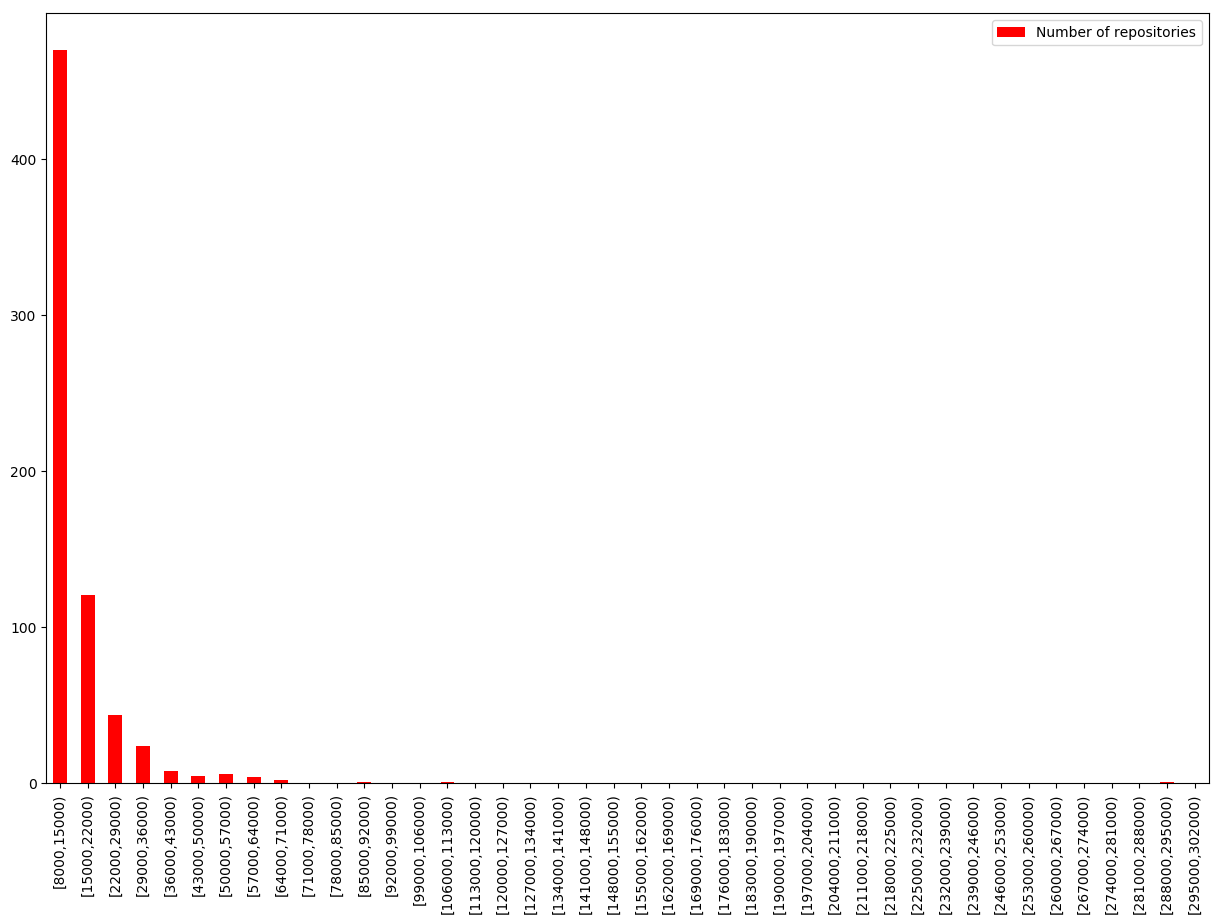

In [17]:
divided_repos = pd.Series(data=classified_repos, index=indexes)
divided_repos.plot(kind='bar', figsize=(15,10), color=['red'],legend=True, label='Number of repositories')

In [18]:
x=git_df['Language'].value_counts()
x.head()
#p = ggplot(aes(x='index',y='count'), data =x) + geom_point(color='coral') + geom_line(color='red')
#print(p)

JavaScript     338
Java            67
Python          63
Ruby            44
Objective-C     43
Name: Language, dtype: int64

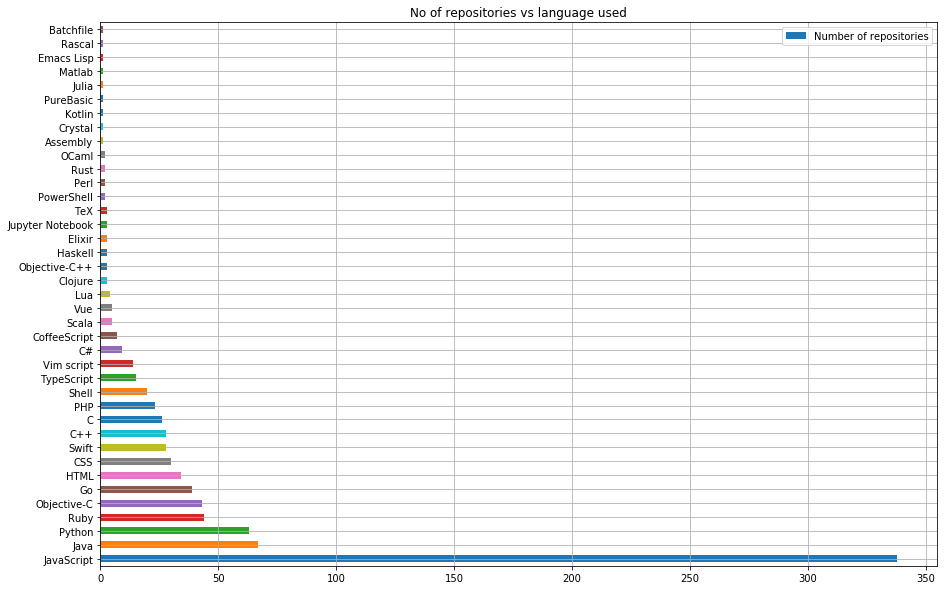

In [19]:
%matplotlib inline
plt.figure()
x.plot(kind='barh',figsize=(15,10),grid=True, label='Number of repositories',legend='No of repos',title='No of repositories vs language used')

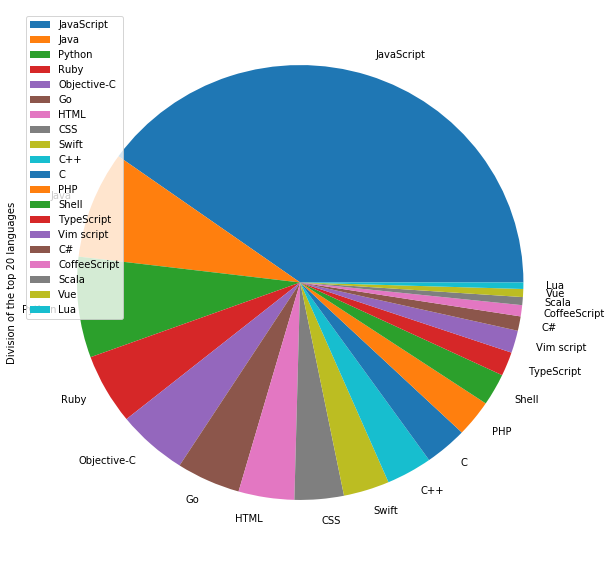

In [20]:
%matplotlib inline
x[:20].plot.pie(label="Division of the top 20 languages",fontsize=10,figsize=(10,10),legend=True)

In [21]:
#git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)
nonull_df = git_df[['Tags','Number of Stars']].dropna()
tags_list = nonull_df['Tags'].str.split(',')

In [22]:
tags_list.head()

0    [nonprofits, certification, curriculum, react,...
1    [javascript, css, html, bootstrap, jekyll-site...
2                   [education, list, books, resource]
4                                      [visualization]
5    [book-series, javascript, training-materials, ...
Name: Tags, dtype: object

(-0.5, 799.5, 399.5, -0.5)

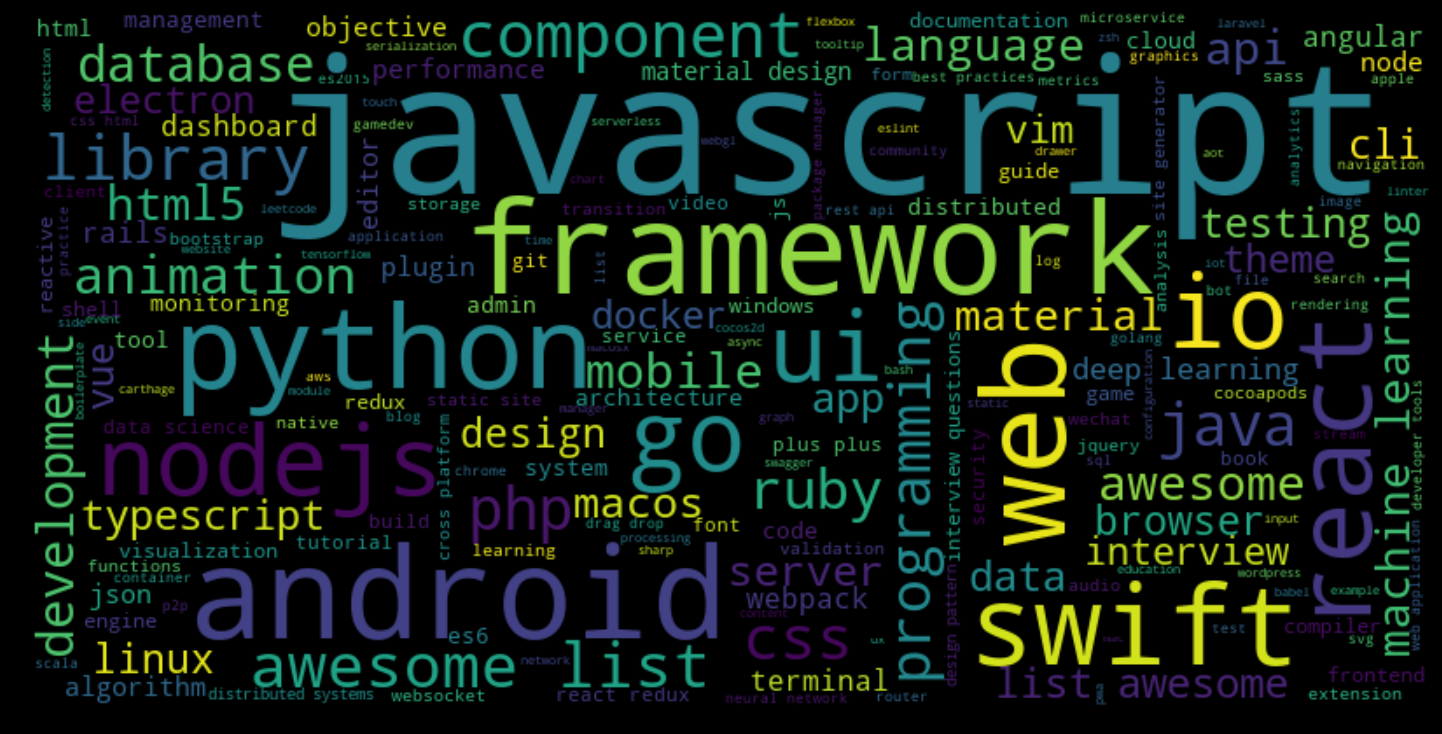

In [23]:
initial = nonull_df['Tags'].str.split(',')
a = []
for item in initial:
       a = a+item
wc_text = ' '.join(a)

%matplotlib inline
wordcloud = WordCloud(background_color='black',width=800, height=400).generate(wc_text)
plt.figure(figsize=(25,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

In [25]:
python_tags = git_df[git_df['Language'] == 'Python'][['Username', 'Repository Name', 'Description', 'Tags']]

In [26]:
python_tags

,Username,Repository Name,Description,Tags
29,vinta,awesome-python,"A curated list of awesome Python frameworks, l...","python,awesome,collections"
42,jakubroztocil,httpie,Modern command line HTTP client user-friendly...,"python,debugging,cli,http,client,json,developm..."
52,nvbn,thefuck,Magnificent app which corrects your previous c...,"python,shell"
54,pallets,flask,"A microframework based on Werkzeug, Jinja2 and...","python,flask,web-framework,wsgi,jinja,werkzeug"
60,rg3,youtube-dl,Command-line program to download videos from Y...,NaN
65,django,django,The Web framework for perfectionists with dead...,"python,django,views,framework,orm,web,apps,tem..."
67,requests,requests,Python HTTP Requests for Humans,"python,http,requests,forhumans,kennethreitz"
77,ansible,ansible,Ansible is a radically simple IT automation pl...,"python,ansible"
79,josephmisiti,awesome-machine-learning,A curated list of awesome Machine Learning fra...,NaN
104,minimaxir,big-list-of-naughty-strings,The Big List of Naughty Strings is a list of s...,NaN
